#Data Loading

In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Data Preprocessing

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values (if any)
data = data.dropna()

# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model Training

In [4]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)


GaussianNB()

# Model Evaluation

Confusion Matrix:
[[55535  1329]
 [   15    83]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



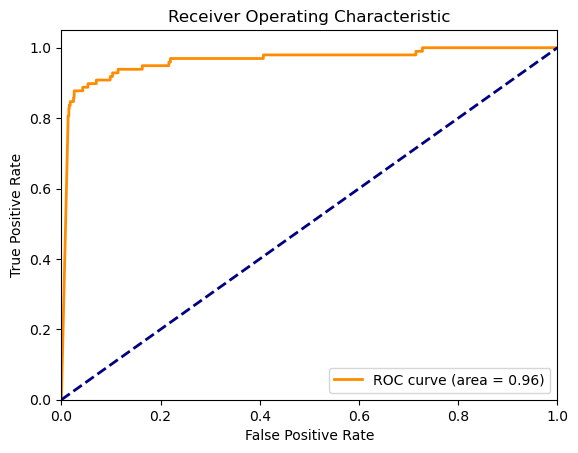

F1 Score: 0.10993377483443707


In [5]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, classification_report

# Predict on the test set
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Model Improvement

In [6]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

# Retrain with best parameters
gnb_best = grid_search.best_estimator_
gnb_best.fit(X_train, y_train)

# Predict and evaluate again
y_pred_best = gnb_best.predict(X_test)
y_prob_best = gnb_best.predict_proba(X_test)[:, 1]

# New F1 Score
f1_best = f1_score(y_test, y_pred_best)
print(f"Improved F1 Score: {f1_best}")

Best parameters found: {'var_smoothing': 1.0}
Improved F1 Score: 0.18698224852071005


# Practical Implementation and Monitoring

In [7]:
import logging

# Set up logging
logging.basicConfig(filename='fraud_detection.log', level=logging.INFO)

# Log initial performance metrics
logging.info(f"Initial F1 Score: {f1}")
logging.info(f"Improved F1 Score: {f1_best}")

# Function to monitor model performance
def monitor_model_performance():
    # Predict on the test set
    y_pred_monitor = gnb_best.predict(X_test)

    # Calculate new performance metrics
    new_f1 = f1_score(y_test, y_pred_monitor)

    # Log the new metrics
    logging.info(f"Monitored F1 Score: {new_f1}")

# Example call to the monitoring function
monitor_model_performance()

# Technical Implementation


In [8]:
# Essential libraries and tools:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, classification_report
import matplotlib.pyplot as plt
import logging

# Stratified Cross-Validation Example
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train_skf, X_test_skf = X.iloc[train_index], X.iloc[test_index]
    y_train_skf, y_test_skf = y.iloc[train_index], y.iloc[test_index]
    gnb_skf = GaussianNB()
    gnb_skf.fit(X_train_skf, y_train_skf)
    y_pred_skf = gnb_skf.predict(X_test_skf)
    f1_skf = f1_score(y_test_skf, y_pred_skf)
    print(f"F1 Score for fold: {f1_skf}")

F1 Score for fold: 0.22106631989596878
F1 Score for fold: 0.2304832713754647
F1 Score for fold: 0.22572178477690286
F1 Score for fold: 0.24537815126050422
F1 Score for fold: 0.22846441947565543
